In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


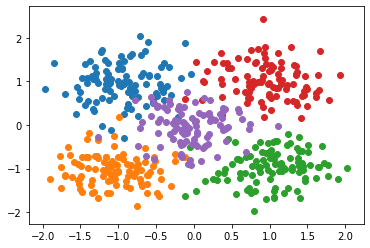

In [8]:
n_pts=500
centers = [[-1,1], [-1,-1], [1,-1], [1,1], [0,0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [9]:
y_cat = to_categorical(y, 5)
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y_cat, verbose=0, batch_size=50, epochs=100)

In [10]:
def plot_decision_boundary(X, y_cat, model):
    x_span=np.linspace(min(X[:,0])-0.25, max(X[:, 0])+0.25)
    y_span=np.linspace(min(X[:,1])-0.25, max(X[:, 1])+0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

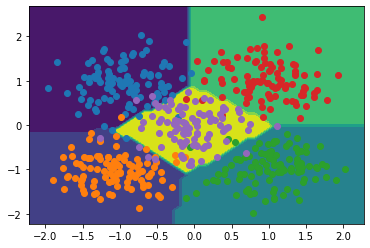

In [11]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

Prediction is :  [3]


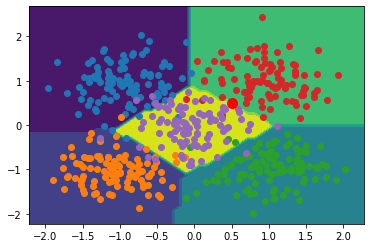

In [12]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
x=0.5
y=0.5
point = np.array([[x,y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color='r')
print("Prediction is : ",prediction)